<h2 align="center"> SINGLE CELLS: </h2>
<h3 align="center"> UMA ANÁLISE DOS TIPOS DE CÉLULA PRESENTES NO INTESTINO  </h3>

<hr>

<p> O intestino é um órgão complexo que promove a digestão, extrai nutrientes, participa na vigilância imunológica, mantém relações simbióticas críticas com a microbiota e afeta a saúde geral. Entender este órgão promove uma melhor analise do comportamento e interação das células que o constituem, entretanto, métodos clássicos de expressão gênica não analisam as interações respeitando o comportamento heterogênico destas, desse modo, a expressão gênica unicelular (scRNA-seq) nos permite uma analise única para determinação do estado, função e resposta celular das células em nível unicelular para mais de milhões de células em um único estudo, permitindo a classificação, distinção e caracterização de cada célula ao nível do transcriptoma. O objetivo deste trabalho é realizar o tratamento de dados do intestino aplicando técnicas de Machine Learning com o datase do Tabula Sapiens.  </p>


<p> O projeto foi elaborado pelos estudantes durante o terceiro semestre de graduação da Ilum - Escola de Ciência, para a disciplina de Aprendizado de Máquina. O grupo é composto pelos estudantes: </p>

<p> 1. Caio Eduardo Palatin  </p>
<p> 2. João Pedro Aroucha de Brito  </p>
<p> 3. Monyque Karoline de Paula Silva </p>
<p align="justify">

<h3 align="="> TRATAMENTO INICIAL DOS DADOS  </h3>


In [10]:
#Importação das bibliotecas
import anndata as ad
import scanpy as sc
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import random

In [11]:

# Leitura do orimeiro arquivo .h5ad
adata = sc.read_h5ad('large.h5ad')

# Leitura do segundo arquivo .h5ad
adatinha = sc.read_h5ad('small.h5ad')

# Analisa a compatibilidade da estrutura dos dois datasets e se forem compatíveis, realizar o merge com o comando 'concat'
if adata.shape[1] == adatinha.shape[1]:
    
    merged_adata = ad.concat([adata, adatinha], index_unique=None)
else:
    print("The AnnData objects have incompatible shapes and cannot be merged.")



In [22]:
# Intestino Delgado
display(adata)

# Intestino Grosso
display(adatinha)

# União dos datas - sem a expressão gênica (ela não conseguiu ser acoplada)
display(merged_adata.obs)

AnnData object with n_obs × n_vars = 13680 × 12449
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'de

AnnData object with n_obs × n_vars = 12467 × 58604
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'de

,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,sex_ontology_term_id,...,development_stage_ontology_term_id,self_reported_ethnicity_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
cell_id,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGCGCCTTG_TSP14_LI_Distal_10X_1_1,EFO:0009922,TSP14,Distal,4572.0,1490,"cd4-positive, alpha-beta t cell",cd4-positive alpha-beta T cell,True,immune,PATO:0000384,...,HsapDv:0000153,HANCESTRO:0005,"CD4-positive, alpha-beta T cell",10x 3' v3,normal,Homo sapiens,male,large intestine,European,59-year-old human stage
AAACCCACACTTGGGC_TSP14_LI_Distal_10X_1_1,EFO:0009922,TSP14,Distal,12874.0,1466,enterocyte of epithelium of large intestine,immature enterocyte,True,epithelial,PATO:0000384,...,HsapDv:0000153,HANCESTRO:0005,enterocyte of epithelium of large intestine,10x 3' v3,normal,Homo sapiens,male,large intestine,European,59-year-old human stage
AAACCCACATTCAGCA_TSP14_LI_Distal_10X_1_1,EFO:0009922,TSP14,Distal,4400.0,1666,monocyte,monocyte,True,immune,PATO:0000384,...,HsapDv:0000153,HANCESTRO:0005,monocyte,10x 3' v3,normal,Homo sapiens,male,large intestine,European,59-year-old human stage
AAACCCAGTATCTTCT_TSP14_LI_Distal_10X_1_1,EFO:0009922,TSP14,Distal,13988.0,2319,enterocyte of epithelium of large intestine,immature enterocyte,True,epithelial,PATO:0000384,...,HsapDv:0000153,HANCESTRO:0005,enterocyte of epithelium of large intestine,10x 3' v3,normal,Homo sapiens,male,large intestine,European,59-year-old human stage
AAACCCAGTGGTATGG_TSP14_LI_Distal_10X_1_1,EFO:0009922,TSP14,Distal,6641.0,1372,enterocyte of epithelium of large intestine,immature enterocyte,True,epithelial,PATO:0000384,...,HsapDv:0000153,HANCESTRO:0005,enterocyte of epithelium of large intestine,10x 3' v3,normal,Homo sapiens,male,large intestine,European,59-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_SI_distal_SS2_B113712_B134443_Immune_F1_S121,EFO:0008931,TSP2,distal,6279929.0,5276,intestinal crypt stem cell,intestinal crypt stem cell,True,epithelial,PATO:0000383,...,HsapDv:0000155,HANCESTRO:0016,intestinal crypt stem cell of large intestine,Smart-seq2,normal,Homo sapiens,female,small intestine,African American or Afro-Caribbean,61-year-old human stage
TSP2_SI_distal_SS2_B113712_B134443_Immune_G2_S146,EFO:0008931,TSP2,distal,48035.0,495,mature enterocyte,mature enterocyte,True,epithelial,PATO:0000383,...,HsapDv:0000155,HANCESTRO:0016,enterocyte of epithelium of large intestine,Smart-seq2,normal,Homo sapiens,female,small intestine,African American or Afro-Caribbean,61-year-old human stage
TSP2_SI_distal_SS2_B113712_B134443_Immune_G7_S151,EFO:0008931,TSP2,distal,103291.0,723,mature enterocyte,mature enterocyte,True,epithelial,PATO:0000383,...,HsapDv:0000155,HANCESTRO:0016,enterocyte of epithelium of large intestine,Smart-seq2,normal,Homo sapiens,female,small intestine,African American or Afro-Caribbean,61-year-old human stage


<h3 align="="> REDUÇÃO DE DIMENSIONALIDADE  </h3>


<h3 align="="> PCA - CAIO  </h3>


In [35]:
# Inserir código caio aqui

<h3 align="="> UMAP  </h3>
<p> O UMAP é uma técnica de redução de dimensão que pode ser usada para visualização de forma semelhante ao t-SNE (ferramenta para visualizar dados de alta dimensão que converte semelhanças entre pontos de dados em probabilidades conjuntas e tenta minimizar a divergência de Kullback-Leibler entre as probabilidades conjuntas da incorporação de baixa dimensão e dos dados de alta dimensão), mas também para redução geral de dimensão não linear.  </p>
<p> Ele é muito utilizado em dados de single-cell devido a alta dimensionalidade por possuir milhares de contagem de expressão gênica por célula individual e conseguir reduzi-las a duas ou três dimensões para que cada célula obtenha uma localização em um gráfico bi ou tridimensional. </p>
<p> De acordo com o próprio UMAP, "Os conjuntos de dados de sequenciamento de RNA unicelular são tão vastos e multidimensionais que, como pesquisador, você não pode simplesmente tentar encontrar um padrão biologicamente significativo lendo seus milhões de pontos de dados. O UMAP foi projetado para ajudar a visualizar as informações para que você possa ver e exibir padrões em seus dados com mais facilidade. Dessa forma, os pontos que formam clusters em um gráfico UMAP podem ser potencialmente interpretados como (sub)tipos de células separadas". </p>


c:\Users\monyque220063\.conda\envs\ilumpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


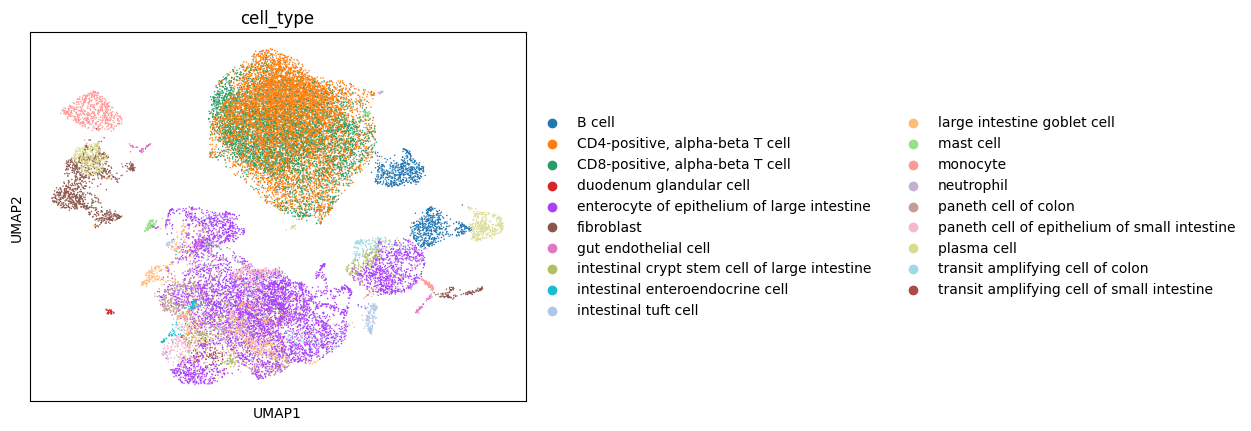

In [14]:
# Aplicação do UMAP
sc.pl.umap(merged_adata, color='cell_type')


<h3 align="="> ENCONTRE MARCADORES GENÉTICOS  </h3>


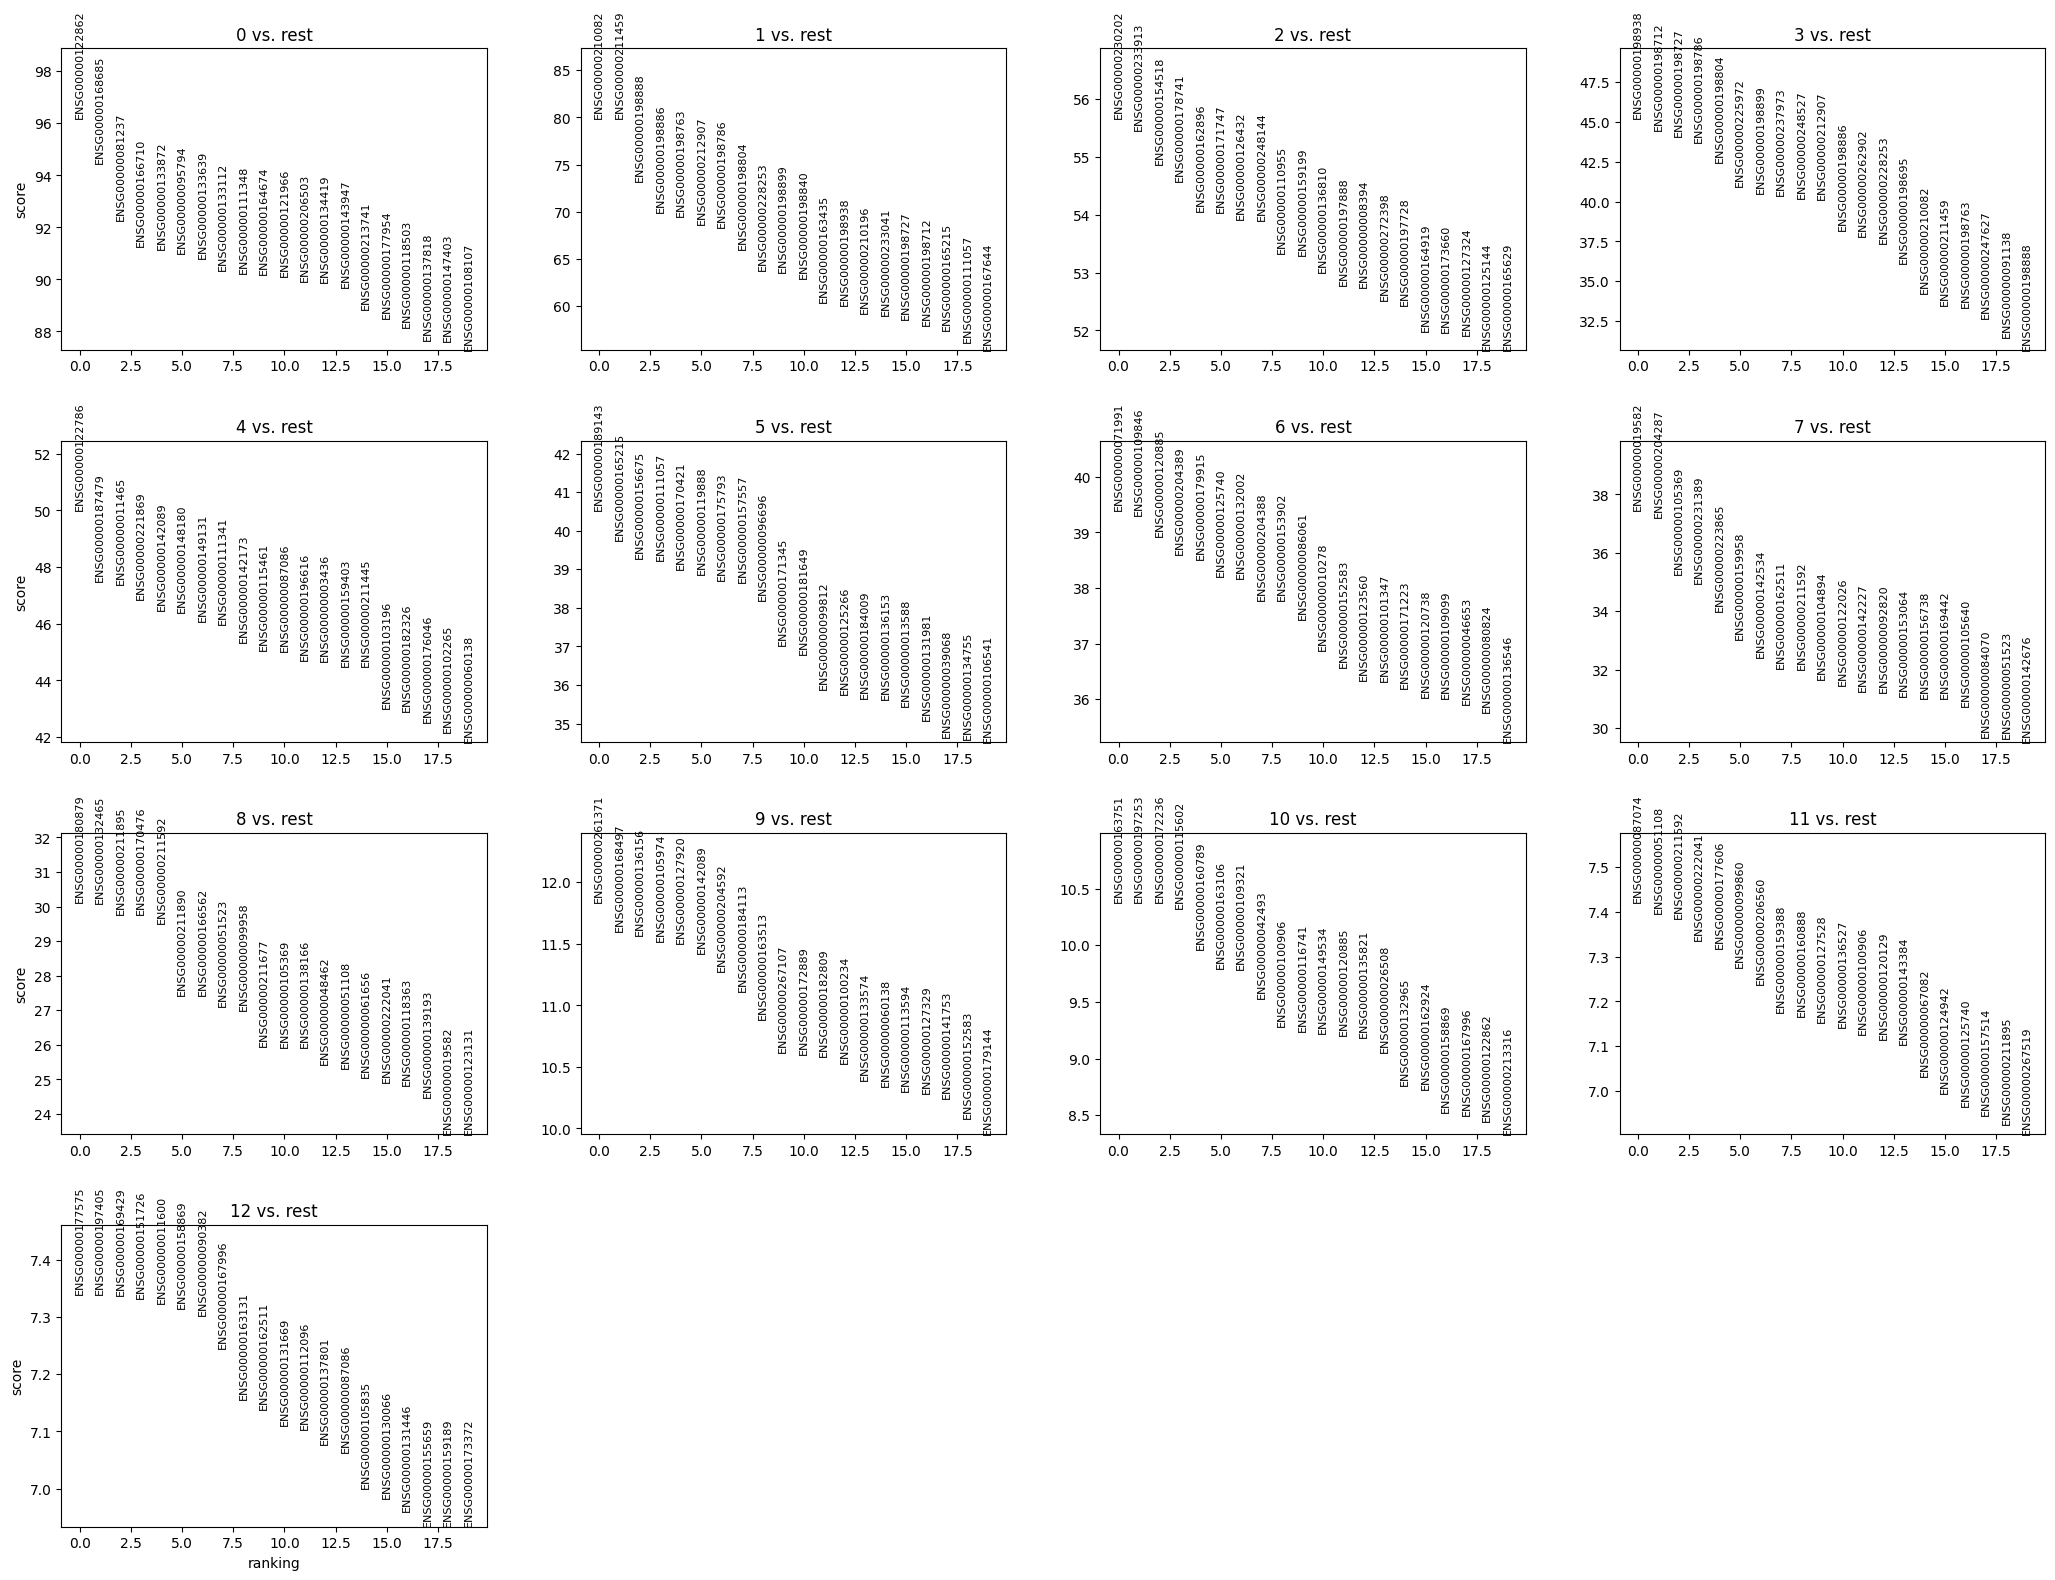

In [34]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, sharey=False)

<h3 align="="> CLUSTER  </h3>


<h3 align="="> LEIDEN  </h3>

<p>Utilização do agrupamento pelo algorítmo leiden, o qual é usado para agrupar células semelhantes com base em seus perfis de expressão gênica e a conectividade entre elas. O algoritmo tenta encontrar agrupamentos de células que são mais densamente conectados entre si do que com células de outros agrupamentos. </p>

c:\Users\monyque220063\.conda\envs\ilumpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


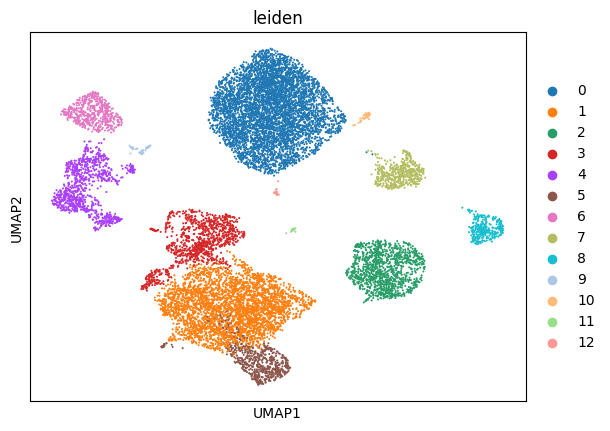

In [32]:
sc.tl.leiden(adata, resolution = 0.30)
sc.pl.umap(adata, color=['leiden'])